In [4]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'

In [5]:
import pandas as pd

In [6]:
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv(url, names=columns)

In [7]:
print(data.head())

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [8]:
print(data.tail())


     buying maint  doors persons lug_boot safety  class
1723    low   low  5more    more      med    med   good
1724    low   low  5more    more      med   high  vgood
1725    low   low  5more    more      big    low  unacc
1726    low   low  5more    more      big    med   good
1727    low   low  5more    more      big   high  vgood


In [9]:
data["class"].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data["buying"] = label_encoder.fit_transform(data["buying"])
data["maint"] = label_encoder.fit_transform(data["maint"])
data["doors"] = label_encoder.fit_transform(data["doors"])
data["persons"] = label_encoder.fit_transform(data["persons"])
data["lug_boot"] = label_encoder.fit_transform(data["lug_boot"])
data["safety"] = label_encoder.fit_transform(data["safety"])
data["class"] = label_encoder.fit_transform(data["class"])

In [11]:
data["class"].unique()

array([2, 0, 3, 1])

array(['unacc', 'acc', 'vgood', 'good']

==>>

array([2, 0, 3, 1])

# 2 = unacc, 0 = acc, 3 = vgood, 1 = good

In [13]:
X = data.drop(['class'], axis= 1)

Y = data['class']

In [14]:
Y.value_counts()

class
2    1210
0     384
1      69
3      65
Name: count, dtype: int64

In [15]:
X["buying"].value_counts()

buying
3    432
0    432
2    432
1    432
Name: count, dtype: int64

In [16]:
Y = pd.get_dummies(Y).values

In [32]:
X = X.values

In [40]:
X

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       ...,
       [1, 1, 3, 2, 0, 1],
       [1, 1, 3, 2, 0, 2],
       [1, 1, 3, 2, 0, 0]])

In [36]:
Y

array([[False, False,  True, False],
       [False, False,  True, False],
       [False, False,  True, False],
       ...,
       [False, False,  True, False],
       [False,  True, False, False],
       [False, False, False,  True]])

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.25,random_state=0)

In [59]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(12,input_shape=(6,),activation='tanh'))
model.add(Dense(8,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()
     

C:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 12)                  │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 4)                   │              44 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 322 (1.26 KB)

 Trainable params: 322 (1.26 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
import numpy as np
model_history=model.fit(x=X_train, y=Y_train, epochs=50, batch_size=32,validation_split=0.1)
y_pred = model.predict(X_test)

y_test_class = np.argmax(Y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)
     

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.0718 - loss: 1.4303 - val_accuracy: 0.1462 - val_loss: 1.3420
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3014 - loss: 1.3218 - val_accuracy: 0.6538 - val_loss: 1.2326
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6560 - loss: 1.1923 - val_accuracy: 0.7231 - val_loss: 0.9769
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6952 - loss: 0.9591 - val_accuracy: 0.7231 - val_loss: 0.7573
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6833 - loss: 0.8537 - val_accuracy: 0.7231 - val_loss: 0.6987
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6901 - loss: 0.7919 - val_accuracy: 0.7231 - val_loss: 0.6698
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7041 - loss: 0.7500 - val_accuracy: 0.7231 - val_loss: 0.6524
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7211 - loss: 0.7085 - val_accuracy: 0.7308 - val_loss

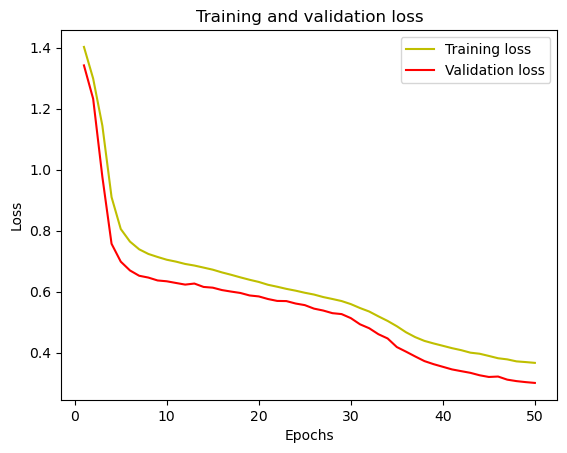

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

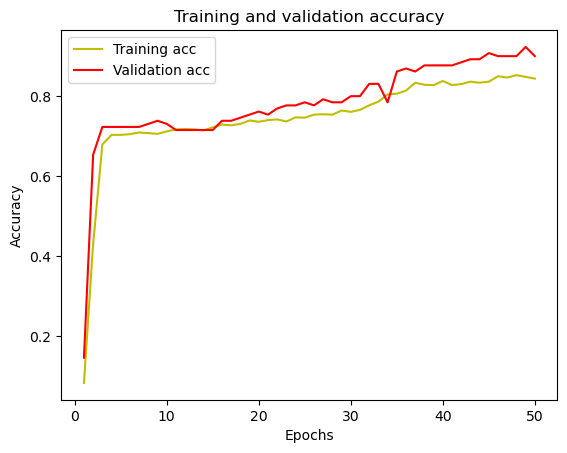

In [65]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [69]:
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.59      0.78      0.67        99
           1       0.00      0.00      0.00        21
           2       0.93      0.95      0.94       296
           3       0.00      0.00      0.00        16

    accuracy                           0.83       432
   macro avg       0.38      0.43      0.40       432
weighted avg       0.77      0.83      0.80       432

[[ 77   0  22   0]
 [ 21   0   0   0]
 [ 16   0 280   0]
 [ 16   0   0   0]]
